# 決定木
- 残差の平方和の合計や、ジニ不純度の合計が最小になるように二分していく。
- 計算量を抑えるため、分割毎に最小になるようにしている。
- 過学習を防ぐため、途中で分割を終えたり、木を剪定し小さくする必要がある。

## ジニ不純度(gini impurity)
どれだけ不純なものが含まれるか

![ジニ不純度](img/gini_impurity.png)

## 決定木の剪定(pruning)
葉の数だけペナルティを与える cost complexity pruning

![剪定](img/pruning.png)

## 決定木モデルを構築する
sklearn.tree.DecisionTreeRegressor(回帰)
- max_depth: 木の深さを指定
- min_samples_split: 最低限分割に必要なデータ数を指定
- ccp_alpha: cost complezity pruningのalphaの値を指定

使い方は他のsklearnのモデルと同じ<br>
パラメータを指定しないと最後まで分割し過学習するので注意

sklearn.tree.DecisionTreeClassifier(分類)
- 使い方はDecisionTreeRegressorと同じ

### データ準備

In [4]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

df = sns.load_dataset('tips')
df = pd.get_dummies(df, drop_first=True)
y_col = 'tip'
X = df.drop(columns=[y_col])
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 実装

In [8]:
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth=4)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [9]:
model.predict(X_test)

array([2.65967742, 3.48      , 2.65967742, 3.075     , 4.1       ,
       3.075     , 3.48      , 3.36428571, 3.48      , 4.73823529,
       2.66625   , 2.66625   , 2.470625  , 1.8085    , 2.470625  ,
       3.78791667, 1.8085    , 2.470625  , 2.65967742, 3.78791667,
       3.78791667, 2.66625   , 1.91857143, 2.470625  , 2.470625  ,
       4.1       , 1.8085    , 3.78791667, 3.78791667, 1.91857143,
       2.470625  , 1.8085    , 1.91857143, 1.8085    , 2.65967742,
       2.470625  , 2.65967742, 1.8085    , 6.73      , 1.91857143,
       1.8085    , 1.8085    , 1.91857143, 3.78791667, 1.8085    ,
       2.65967742, 2.65967742, 3.36428571, 2.65967742, 3.78791667,
       3.36428571, 3.48      , 3.48      , 6.73      , 1.8085    ,
       1.8085    , 3.78791667, 3.78791667, 2.470625  , 1.8085    ,
       3.36428571, 1.91857143, 3.36428571, 3.78791667, 3.78791667,
       1.91857143, 4.1       , 2.66625   , 1.8085    , 3.36428571,
       1.91857143, 1.8085    , 3.78791667, 2.470625  ])

## 決定技モデルを可視化する
sklearn.tree.plot_tree(描画)
- decision_tree: モデルインスタンス
- fontsize: フォントのサイズを指定
- feature_name: 特徴量の名前をリストで渡す(model.feature_names_in_が便利)

sklearnのtreeモデルを引数にする<br>
図の内容が戻り値で返ってくる

sklearn.tree.export_text(テキスト)
- 使い方はplot_treeと同じ
- print()関数にわたして表示することで綺麗に表示される

### 実装

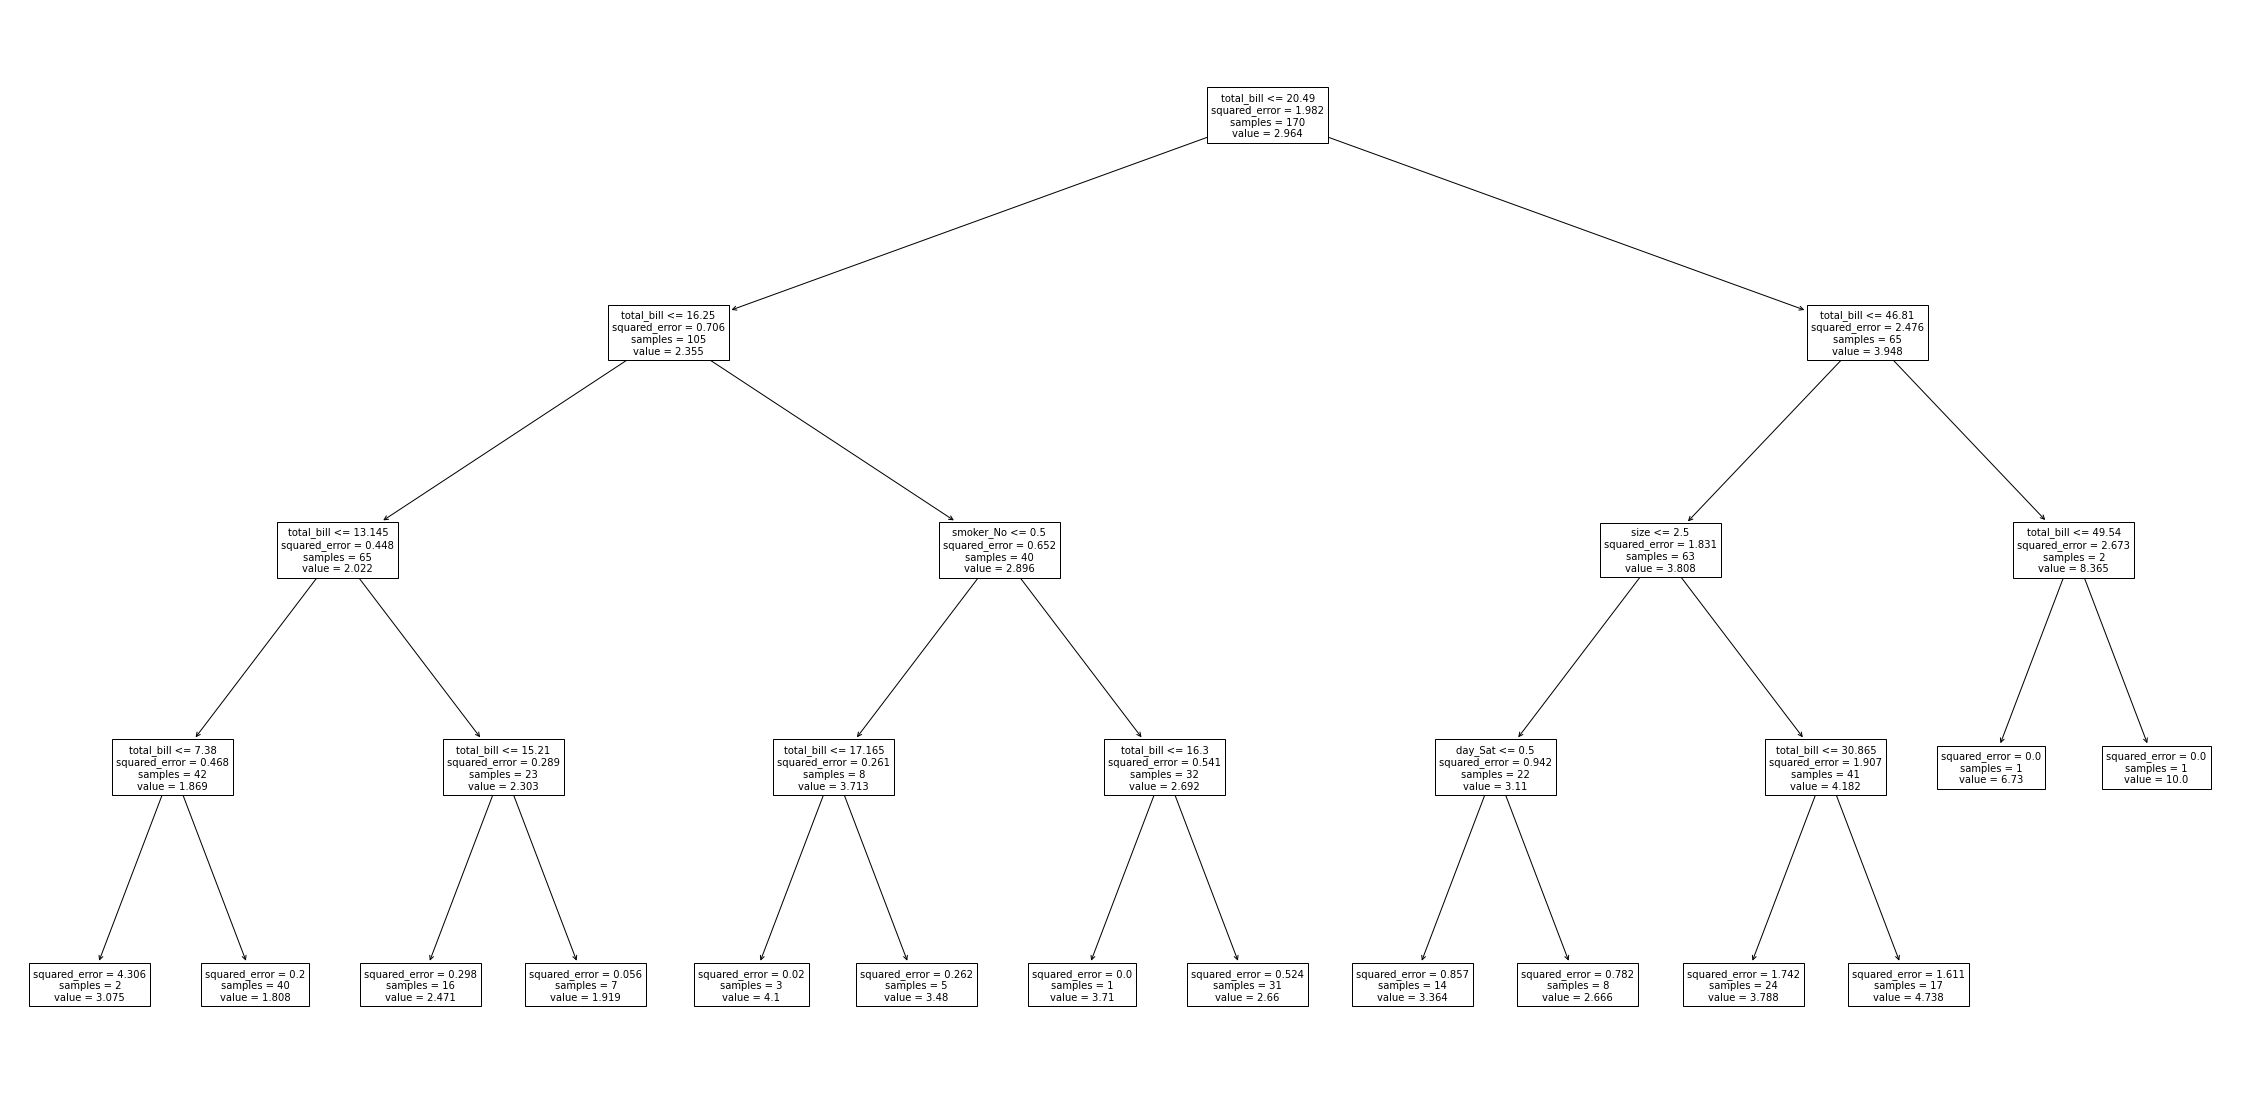

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 20))
_ = tree.plot_tree(model, fontsize=10, feature_names=model.feature_names_in_)

In [18]:
print(tree.export_text(model, feature_names=list(model.feature_names_in_)))

|--- total_bill <= 20.49
|   |--- total_bill <= 16.25
|   |   |--- total_bill <= 13.14
|   |   |   |--- total_bill <= 7.38
|   |   |   |   |--- value: [3.08]
|   |   |   |--- total_bill >  7.38
|   |   |   |   |--- value: [1.81]
|   |   |--- total_bill >  13.14
|   |   |   |--- total_bill <= 15.21
|   |   |   |   |--- value: [2.47]
|   |   |   |--- total_bill >  15.21
|   |   |   |   |--- value: [1.92]
|   |--- total_bill >  16.25
|   |   |--- smoker_No <= 0.50
|   |   |   |--- total_bill <= 17.16
|   |   |   |   |--- value: [4.10]
|   |   |   |--- total_bill >  17.16
|   |   |   |   |--- value: [3.48]
|   |   |--- smoker_No >  0.50
|   |   |   |--- total_bill <= 16.30
|   |   |   |   |--- value: [3.71]
|   |   |   |--- total_bill >  16.30
|   |   |   |   |--- value: [2.66]
|--- total_bill >  20.49
|   |--- total_bill <= 46.81
|   |   |--- size <= 2.50
|   |   |   |--- day_Sat <= 0.50
|   |   |   |   |--- value: [3.36]
|   |   |   |--- day_Sat >  0.50
|   |   |   |   |--- value: [2.67]

## 重要度の可視化
.feature_importances_ 属性で特徴量の重要度をリストで取得

<BarContainer object of 8 artists>

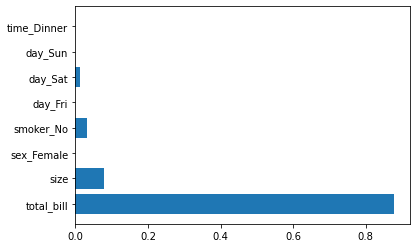

In [24]:
plt.barh(model.feature_names_in_, model.feature_importances_)


## Minimal cost complexity pruning
.cost_complexity_pruning_path(X, y)で、αと不純度をリストで取得する<br>
それぞれのαでのモデルの精度を計測し、最良のαを使用する

In [34]:
from sklearn.metrics import mean_squared_error
model = tree.DecisionTreeRegressor(random_state=0)
# 辞書型
path = model.cost_complexity_pruning_path(X_train, y_train)
eff_alphas = path.ccp_alphas

models = []
for eff_alpha in eff_alphas:
    model = tree.DecisionTreeRegressor(random_state=0, ccp_alpha=eff_alpha)
    model.fit(X_train, y_train)
    models.append(model)
    
train_scores = [mean_squared_error(y_train, model.predict(X_train)) for model in models]
test_scores = [mean_squared_error(y_test, model.predict(X_test)) for model in models]


Text(0, 0.5, 'MSE')

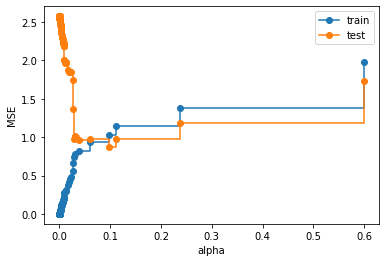

In [36]:
plt.plot(eff_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
plt.plot(eff_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')